# Scott Breitbach
## 26-April-2021
## DSC550, Milestone 2

### Old Data Set
As I worked through Milestone 1, it slowly dawned on me that the dataset I was using from my job probably wasn't going to work for this project, largely because the variables I was interested in using were very much lacking in data. However, I decided to complete that part of the assignment before considering switching.  
Ultimately, I did decide to switch and I found another data set to work on and I will try to echo some of the Milestone 1 activities with this data set in order to familarize myself with it before I proceed on to Milestone 2.

### New Data Set
The new data set I found is about categorizing beans. I found this interesting because I grew up farming and considered going into plant genetics before I ended up working in microbiology. Being able to categorize plant seeds based on their attributes can be a useful tool for a seed company and this data set contains attributes that were automatically generated based on high resolution photography. In a real world scenario, this could be used toward automatic sorting of seeds.

# Milestone 1, Revisited:

In [1]:
# Load Libraries
import pandas as pd
import numpy as np

### Load the Data

In [2]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

### Get A Look at the Data

In [3]:
# Check the dimensions of the table
print(f"The table is {beanDF.shape[0]} rows x {beanDF.shape[1]} columns.")

The table is 13611 rows x 17 columns.


In [4]:
# Get an initial look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Describe the data
print("Describe Data:")
beanDF.describe()

Describe Data:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
# Summarize the data
print("Summarized Data:")
beanDF.describe(include=['O'])

Summarized Data:


,Class
count,13611
unique,7
top,DERMASON
freq,3546


In [7]:
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

In [8]:
beanDF.groupby('Class').mean()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,69804.133132,1046.105764,370.044279,240.309352,1.544395,0.754665,71025.729198,297.311018,0.749273,0.982804,0.800200,0.805001,0.005357,0.001394,0.649144,0.995739
BOMBAY,173485.059387,1585.619079,593.152075,374.352547,1.585550,0.770518,175813.116858,468.941426,0.776559,0.986902,0.864421,0.792622,0.003442,0.000844,0.629195,0.991841
CALI,75538.211043,1057.634282,409.499538,236.370616,1.733663,0.814804,76688.503067,309.535280,0.758953,0.985021,0.845934,0.756703,0.005459,0.001107,0.573022,0.990584
DERMASON,32118.710942,665.209536,246.557279,165.657143,1.490471,0.736632,32498.435138,201.683813,0.752953,0.988226,0.908114,0.819110,0.007755,0.002161,0.671636,0.996914
HOROZ,53648.508817,919.859676,372.570290,184.170663,2.026119,0.867443,54440.091805,260.730715,0.706393,0.985480,0.794420,0.700880,0.007007,0.001048,0.491791,0.991926
SEKER,39881.299951,727.672440,251.291957,201.909653,1.245182,0.584781,40269.567341,224.948441,0.771674,0.990351,0.944508,0.896841,0.006334,0.002541,0.805149,0.998383
SIRA,44729.128604,796.418737,299.380258,190.800250,1.570083,0.767277,45273.099772,238.335316,0.749445,0.987971,0.884652,0.797345,0.006720,0.001683,0.636358,0.995385


In [9]:
pd.isnull(beanDF).any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

In [10]:
# Look for correlations
corrDF = beanDF.corr()
corrDF

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


### Think About the Data

* The **Class** variable will be the *target* and all other variables will be the features.
* All of the variables are **numeric** with the exception of the target variable, which is **categorical**.
* The *target* variable contains **7** unique categories, but there are *not* an equal number of each.
* Some of the beans appear to be much larger than others and should be relatively easy to classify, while others could prove more difficult.
* **None** of the columns appear to contain **NaNs**.

Some of the features are very strongly correlated with each other, indicating that they might be good candidates for dimensionality reduction because they might not be adding any additional information (i.e. they are redundant).

### Visualize the Data

In [11]:
# Load libraries
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D  # Package for visualization of the correlation

In [12]:
# Set up figure size
plt.rcParams['figure.figsize'] = (20, 15)

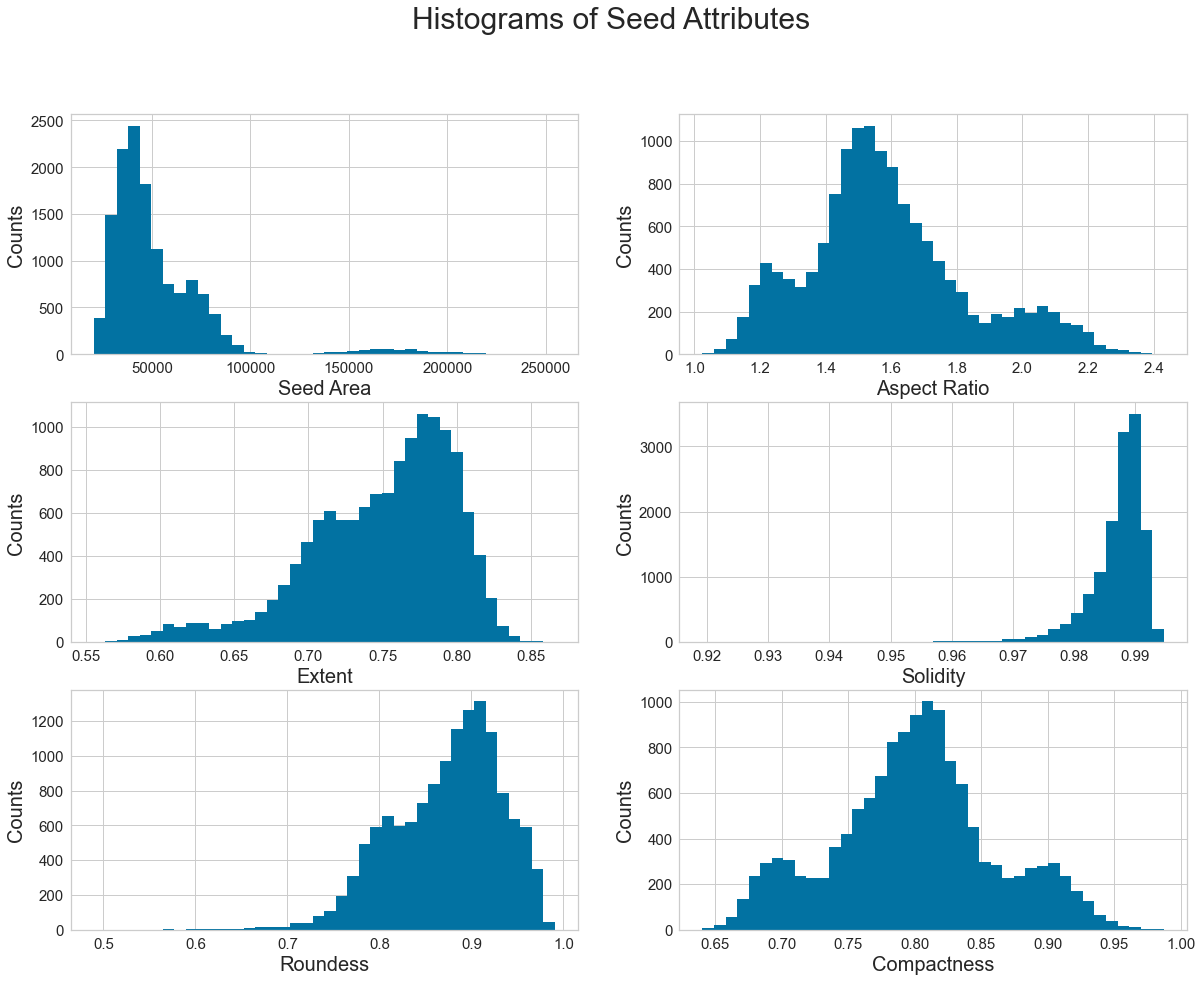

In [13]:
# Make subplots
fig, axes = plt.subplots(nrows=3, ncols=2)

# Specify the features of interest
num_features = ['Area', 'AspectRation', 'Extent', 
                'Solidity', 'roundness', 'Compactness']
xAxes = ['Seed Area', 'Aspect Ratio', 'Extent',
         'Solidity', 'Roundess', 'Compactness']
yAxes = ['Counts'] * 6

# Draw histrograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(beanDF[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xAxes[idx], fontsize=20)
    ax.set_ylabel(yAxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.suptitle("Histograms of Seed Attributes", fontsize=30)
    
plt.show()

In [14]:
# Set up figure size
plt.rcParams['figure.figsize'] = (20, 10)

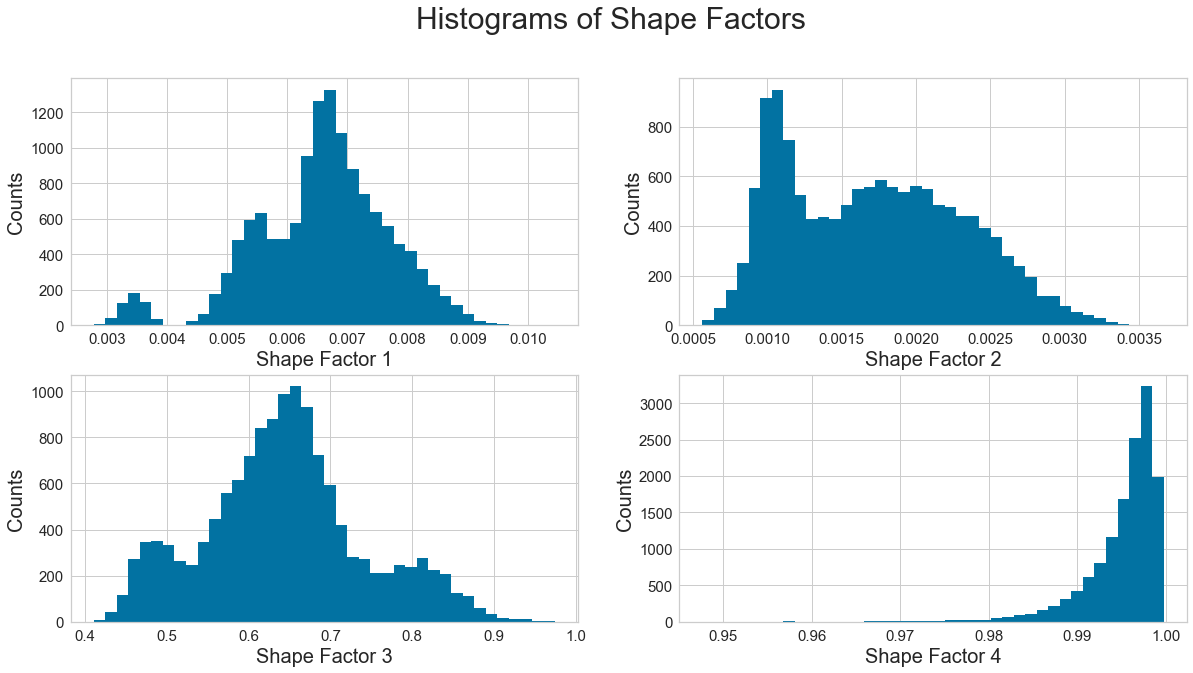

In [15]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Specify the features of interest
num_features = ['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
xAxes = ['Shape Factor 1', 'Shape Factor 2', 'Shape Factor 3', 'Shape Factor 4']
yAxes = ['Counts'] * 4

# Draw histrograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(beanDF[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xAxes[idx], fontsize=20)
    ax.set_ylabel(yAxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.suptitle("Histograms of Shape Factors", fontsize=30)
    
plt.show()

Some of these appear pretty skewed and should be transformed, probably either by a log-transform, if skewed right, or a square or cubed root, if skewed left. I also see several that appear to be multi-modal, likely a result of the different bean attributes, which is good for classification.

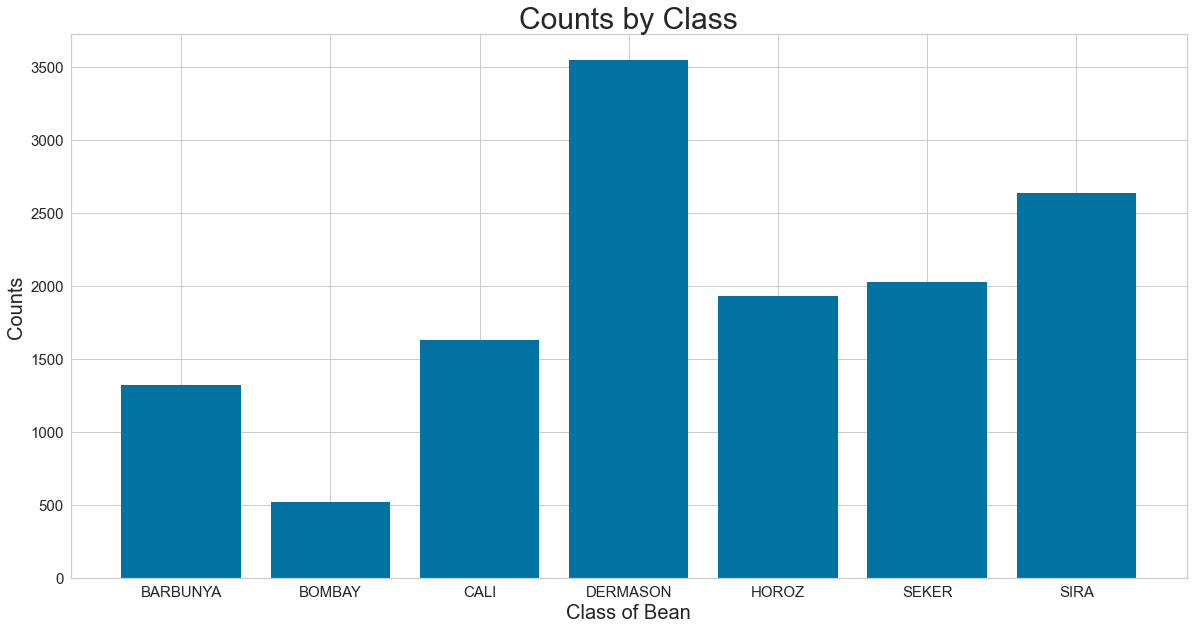

In [16]:
# Get the data ready to feed into the visualizer
X_Class = beanDF.groupby('Class').size().reset_index(name='Counts')['Class']
Y_Class = beanDF.groupby('Class').size().reset_index(name='Counts')['Counts']

# Make the 1st bar plot
plt.bar(X_Class, Y_Class)
plt.title('Counts by Class', fontsize=30)
plt.xlabel('Class of Bean', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

plt.show()

Again, some beans are under-represented in the data, while others are over-represented. Just thinking off-the-cuff, I could use sampling / resampling to make each one ~2000, which would keep the overall size of the data set about the same.

In [17]:
# Extract the numpy arrays from the DataFrame
num_features = beanDF.columns[:-1]
X = beanDF[num_features].values

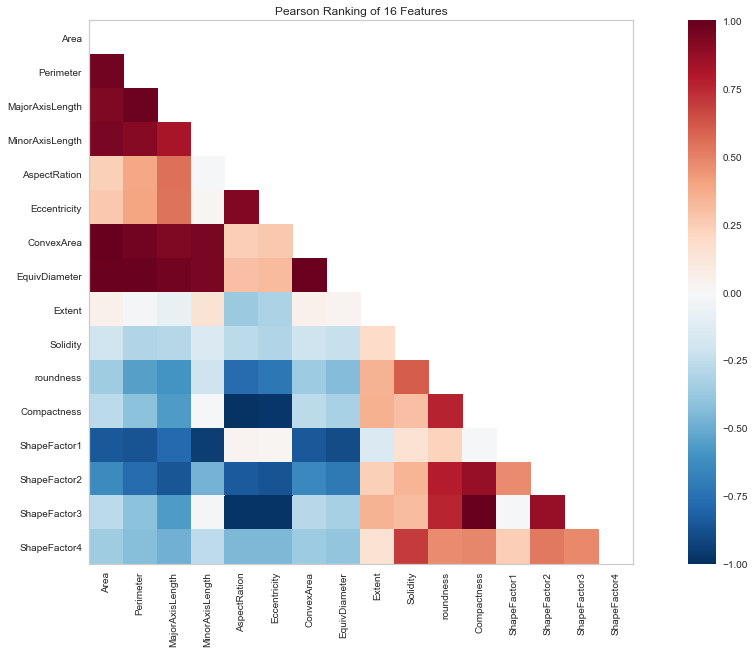

<AxesSubplot:title={'center':'Pearson Ranking of 16 Features'}>

In [18]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof() # Draw/show/poof the data

# Milestone 2:

### Fill In Missing Values and Eliminate Features